## Introduction

This quick kernel provides the code to help you do the following:
    
    - Listen to an audio file in a jupyter notebook
    - Read the files associated with this dataset
    - Create a spectrogram
    - Read an audio file as a numpy array
    - Slice an audio file into sections

<hr>

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

# Don't Show Warning Messages
import warnings
warnings.filterwarnings('ignore')

## What files are available?

In [6]:
# demographic_info.txt was added in version 2

#os.listdir('../input') 
#os.listdir('C:\\Users/n9972552/Downloads/respiratory-sound-database')
data_dir='C:\\Users/n9972552/Downloads/respiratory-sound-database/'
os.listdir(data_dir)

['demographic_info.txt', 'Respiratory_Sound_Database']

In [7]:
#os.listdir('../input/respiratory_sound_database/Respiratory_Sound_Database')
os.listdir(data_dir+'Respiratory_Sound_Database')

['audio_and_txt_files',
 'filename_differences.txt',
 'filename_format.txt',
 'patient_diagnosis.csv']

There are a total of 4 files and one folder.

## Listen to an Audio File

In [8]:
# Install the pydub library

# Check that kernel Internet is connected before running this cell
! pip install pydub

In [9]:
# Play an audio file

from pydub import AudioSegment
import IPython

# We will listen to this file:
# 213_1p5_Pr_mc_AKGC417L.wav

audio_file = '213_1p5_Pr_mc_AKGC417L.wav'

#path = \
#'../input/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/' + audio_file
path = data_dir+'Respiratory_Sound_Database/audio_and_txt_files/'+audio_file

IPython.display.Audio(path)

## Read the Files

### a. Read the 'demographic_info.txt' file

In [14]:
path = data_dir+'demographic_info.txt'
col_names = ['patient_id', 'age', 'sex', 'adult_bmi', 'child_weight', 'child_height']

# Adult BMI (kg/m2)
# Child Weight (kg)
# Child Height (cm)

df_demo = pd.read_csv(path, sep=" ", header=None, names=col_names)

df_demo#[10:20]#.head(10)

patient_id    age  sex  adult_bmi  child_weight  child_height
0           101   3.00    F        NaN          19.0          99.0
1           102   0.75    F        NaN           9.8          73.0
2           103  70.00    F      33.00           NaN           NaN
3           104  70.00    F      28.47           NaN           NaN
4           105   7.00    F        NaN          32.0         135.0
..          ...    ...  ...        ...           ...           ...
121         222  60.00    M        NaN           NaN           NaN
122         223    NaN  NaN        NaN           NaN           NaN
123         224  10.00    F        NaN          32.3         143.0
124         225   0.83    M        NaN           7.8          74.0
125         226   4.00    M        NaN          16.7         103.0

[126 rows x 6 columns]

### b. Read the 'patient_diagnosis.csv' file

In [15]:
path = data_dir + 'Respiratory_Sound_Database/patient_diagnosis.csv'

df_diag = pd.read_csv(path, header=None, names=['patient_id', 'diagnosis'])

df_diag#.head(10)

patient_id  diagnosis
0           101       URTI
1           102    Healthy
2           103     Asthma
3           104       COPD
4           105       URTI
..          ...        ...
121         222       COPD
122         223       COPD
123         224    Healthy
124         225    Healthy
125         226  Pneumonia

[126 rows x 2 columns]

### c. Read the 'filename_differences.txt' file

In [16]:
path = data_dir + 'Respiratory_Sound_Database/filename_differences.txt'

df_diff = pd.read_csv(path, sep=" ", header=None, names=['file_names'])

df_diff#.head(10)

file_names
0   '101_1b1_Al_sc_AKGC417L'
1   '101_1b1_Pr_sc_AKGC417L'
2   '102_1b1_Ar_sc_AKGC417L'
3   '105_1b1_Tc_sc_LittC2SE'
4   '108_1b1_Al_sc_LittC2SE'
..                       ...
86  '224_1b1_Tc_sc_AKGC417L'
87  '224_1b2_Al_sc_AKGC417L'
88  '225_1b1_Pl_sc_AKGC417L'
89  '226_1b1_Al_sc_LittC2SE'
90  '226_1b1_Ll_sc_LittC2SE'

[91 rows x 1 columns]

### d. Read the 'filename_format.txt' file

The file naming format is described on the Kaggle description page for this dataset. That description reads much more clearly than the format displayed here.

In [19]:
path = data_dir + '/Respiratory_Sound_Database/filename_format.txt'

data = open(path, 'r').read()

data

'Elements contained in the filenames:\n\nPatient number (101,102,...,226)\nRecording index\nChest location (Trachea (Tc), {Anterior (A), Posterior (P), Lateral (L)}{left (l), right (r)})\nAcquisition mode (sequential/single channel (sc), simultaneous/multichannel (mc))\nRecording equipment (AKG C417L Microphone, 3M Littmann Classic II SE Stethoscope, 3M Litmmann 3200 Electronic Stethoscope, WelchAllyn Meditron Master Elite Electronic Stethoscope)'

### e. List the files in the 'audio_and_txt_files' folder

In [25]:
path = data_dir + 'Respiratory_Sound_Database/audio_and_txt_files'

os.listdir(path)

['101_1b1_Al_sc_Meditron.txt',
 '101_1b1_Al_sc_Meditron.wav',
 '101_1b1_Pr_sc_Meditron.txt',
 '101_1b1_Pr_sc_Meditron.wav',
 '102_1b1_Ar_sc_Meditron.txt',
 '102_1b1_Ar_sc_Meditron.wav',
 '103_2b2_Ar_mc_LittC2SE.txt',
 '103_2b2_Ar_mc_LittC2SE.wav',
 '104_1b1_Al_sc_Litt3200.txt',
 '104_1b1_Al_sc_Litt3200.wav',
 '104_1b1_Ar_sc_Litt3200.txt',
 '104_1b1_Ar_sc_Litt3200.wav',
 '104_1b1_Ll_sc_Litt3200.txt',
 '104_1b1_Ll_sc_Litt3200.wav',
 '104_1b1_Lr_sc_Litt3200.txt',
 '104_1b1_Lr_sc_Litt3200.wav',
 '104_1b1_Pl_sc_Litt3200.txt',
 '104_1b1_Pl_sc_Litt3200.wav',
 '104_1b1_Pr_sc_Litt3200.txt',
 '104_1b1_Pr_sc_Litt3200.wav',
 '105_1b1_Tc_sc_Meditron.txt',
 '105_1b1_Tc_sc_Meditron.wav',
 '106_2b1_Pl_mc_LittC2SE.txt',
 '106_2b1_Pl_mc_LittC2SE.wav',
 '106_2b1_Pr_mc_LittC2SE.txt',
 '106_2b1_Pr_mc_LittC2SE.wav',
 '107_2b3_Al_mc_AKGC417L.txt',
 '107_2b3_Al_mc_AKGC417L.wav',
 '107_2b3_Ar_mc_AKGC417L.txt',
 '107_2b3_Ar_mc_AKGC417L.wav',
 '107_2b3_Ll_mc_AKGC417L.txt',
 '107_2b3_Ll_mc_AKGC417L.wav',
 '107_2b

### f. Display the contents of one annotation .txt file

In [26]:
path = data_dir + 'Respiratory_Sound_Database/audio_and_txt_files/154_2b4_Al_mc_AKGC417L.txt'

col_names = ['Beginning_of_respiratory_cycle', 'End_of_respiratory_cycle', 'Presence/absence_of_crackles', 'Presence/absence_of_wheezes']

# Respiratory cycle column values are in 'seconds'.
# Presence = 1
# Absence = 0

df_annot = pd.read_csv(path, sep="\t", header=None, names=col_names)

df_annot#.head(10)

Beginning_of_respiratory_cycle  End_of_respiratory_cycle  \
0                           1.330                     3.804   
1                           3.804                     6.396   
2                           6.396                     8.938   
3                           8.938                    11.580   
4                          11.580                    14.072   
5                          14.072                    17.049   
6                          17.049                    19.490   

   Presence/absence_of_crackles  Presence/absence_of_wheezes  
0                             0                            0  
1                             0                            0  
2                             1                            0  
3                             1                            0  
4                             1                            0  
5                             1                            0  
6                             1                            0

##  Create an Audio  Spectrogram

A microphone records small variations in air pressure (represented by changes in voltage) over time. The ear percieves these slight variations in air pressure as sound. The spectrogram tells us how much different frequencies are present (loudness) in an audio clip at a moment in time.

We will use this audio file:<br>
154_2b4_Al_mc_AKGC417L.wav

First let's take a look at the annotation text file for this audio recording to see how many respiration cycles have been recorded.

In [27]:
path = data_dir + 'Respiratory_Sound_Database/audio_and_txt_files/154_2b4_Al_mc_AKGC417L.txt'

col_names = ['Beginning_of_respiratory_cycle', 'End_of_respiratory_cycle', 'Presence/absence_of_crackles', 'Presence/absence_of_wheezes']

# Respiratory cycle column values are in 'seconds'.
# Presence = 1
# Absence = 0

df_annot = pd.read_csv(path, sep="\t", header=None, names=col_names)

df_annot#.head(20)

Beginning_of_respiratory_cycle  End_of_respiratory_cycle  \
0                           1.330                     3.804   
1                           3.804                     6.396   
2                           6.396                     8.938   
3                           8.938                    11.580   
4                          11.580                    14.072   
5                          14.072                    17.049   
6                          17.049                    19.490   

   Presence/absence_of_crackles  Presence/absence_of_wheezes  
0                             0                            0  
1                             0                            0  
2                             1                            0  
3                             1                            0  
4                             1                            0  
5                             1                            0  
6                             1                            0

We see that this recording contains 7 respiration cycles. We also see that crackles are present on 5 of the 7 cycles.

In [28]:
# Install the pysoundfile library
! pip install pysoundfile

In [29]:
import soundfile as sf

# Define helper functions

# Load a .wav file. 
# These are 24 bit files. The PySoundFile library is able to read 24 bit files.
# https://pysoundfile.readthedocs.io/en/0.9.0/

def get_wav_info(wav_file):
    data, rate = sf.read(wav_file)
    return data, rate

# source: Andrew Ng Deep Learning Specialization, Course 5
def graph_spectrogram(wav_file):
    data, rate = get_wav_info(wav_file)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

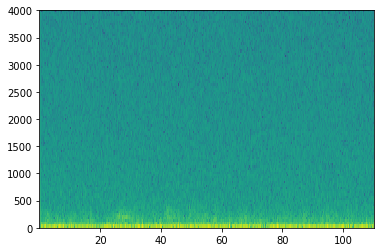

In [30]:
# plot the spectrogram

path = data_dir + 'Respiratory_Sound_Database/audio_and_txt_files/154_2b4_Al_mc_AKGC417L.wav'


x = graph_spectrogram(path)

Time is on the x axis and Frequencies are on the y axis. The intensity of the different colours shows the amount of energy i.e. how loud the sound is, at different frequencies, at different times.

## Read an audio file as a numpy array

In [31]:
# choose an audio file
audio_file = '154_2b4_Al_mc_AKGC417L.wav'

path = data_dir + 'Respiratory_Sound_Database/audio_and_txt_files/' + audio_file

# read the file
data, rate = sf.read(path)

# display the numpy array
data

array([0.        , 0.        , 0.        , ..., 0.02538395, 0.02573287,
       0.02593136])

In [32]:
data.shape

(882000,)

## How to slice a section from an audio file

In [33]:
# https://stackoverflow.com/questions/37999150/
# python-how-to-split-a-wav-file-into-multiple-wav-files

from pydub import AudioSegment

# note: Time is given in seconds. Will be converted to milliseconds later.
start_time = 0
end_time = 7

t1 = start_time * 1000 # pydub works in milliseconds
t2 = end_time * 1000
newAudio = AudioSegment.from_wav(path) # path is defined above
newAudio = newAudio[t1:t2]
newAudio.export('new_slice.wav', format="wav")

<_io.BufferedRandom name='new_slice.wav'>

In [34]:
# Lets listen to the new slice

IPython.display.Audio('new_slice.wav')

## Helpful Resources

I found these resources very helpful:

1. Andrew Ng Sequence Models Course, Week 3, Trigger Word Detection Assignment<br>
https://www.coursera.org/learn/nlp-sequence-models

2. PySoundFile Library<br>
https://pysoundfile.readthedocs.io/en/0.9.0/

3. How to read a 24 bit wav file<br>
https://stackoverflow.com/questions/16719453/how-to-read-and-write-24-bit-wav-file-using-scipy-or-common-alternative

4. PyDub Library<br>
https://github.com/jiaaro/pydub


<hr>
I hope you enjoy working with this dataset.